<a href="https://colab.research.google.com/github/MalikLewis0619/blank-app/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Create a Model class that inherits nn.*module*

In [ ]:
class Model(nn.Module):
# Import layers(4 features of the flower) --> Hidden Layer1(Number of neurons) --> Hidden Layer2(n) --> output(3 classes of iris flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from os import replace
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-8-1901168448>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Train test and Split

In [ ]:
X = my_df.drop('species', axis=1)
y = my_df['species']

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
epochs = 100
losses = []

In [ ]:
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%10 == 0:
        print(f'Epoch: {i} and Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and Loss: 1.1251550912857056
Epoch: 10 and Loss: 1.0096259117126465
Epoch: 20 and Loss: 0.8157405853271484
Epoch: 30 and Loss: 0.585706353187561
Epoch: 40 and Loss: 0.3999636471271515
Epoch: 50 and Loss: 0.26768800616264343
Epoch: 60 and Loss: 0.17942361533641815
Epoch: 70 and Loss: 0.12151690572500229
Epoch: 80 and Loss: 0.0860118493437767
Epoch: 90 and Loss: 0.06520850956439972


Text(0.5, 0, 'Epochs')

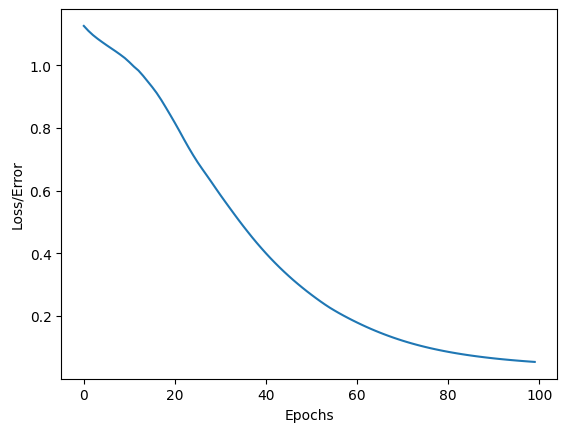

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')

In [ ]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.1315)

In [ ]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619

In [ ]:
new_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [ ]:
with torch.no_grad():
    print(model.forward(new_iris))
    print(model.forward(new_iris).argmax().item())

tensor([ 3.1087, -0.8498, -2.1556])
0


In [ ]:
torch.save(model.state_dict(), 'iris_model.pt')

Loading saved model

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

Making sure it loaded correctly

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)